In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
#Carga de librerias
from PIL import Image
import os
import numpy as np

# Ruta a la carpeta que contiene las imágenes
folder_path = '/content/drive/My Drive/perros/Todo'

# Lista para almacenar las imágenes cargadas
image_list = []
#Lista para almacenar las etiquetas
y = []
# Recorre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if 'perro' in filename:
      y.append(0) #indice 0 perro [perro,persona,casa]
    elif 'persona' in filename: #indice 1 persona
      y.append(1)
    elif 'casa' in filename: #indice 2 casa
      y.append(2)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize((128, 128))  # Redimensiona la imagen
        img_array = np.array(img) / 255.0  # Normaliza los valores de píxeles
        image_list.append(img_array)


# Ahora 'image_list_train' contiene todas las imágenes cargadas


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_list, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
X_train[0].shape

(224, 224, 3)

In [28]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [29]:
# Cargar el modelo MobileNetV2 preentrenado sin la capa superior
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Añadir una nueva capa personalizada
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)  # Clasificación binaria: gatos y perros

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

In [30]:
#Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

In [31]:
#Se compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#Verificamos la estructura de salida esperada para entrenamiento
y_train

[0, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1]

In [25]:
#Cambiamos la forma
X_train = np.array(X_train)
y_train = np.array(y_train)

In [26]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [14]:
X_train.shape

(26, 224, 224, 3)

In [15]:
#Verificamos el cambio
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [16]:
type(y_train)

numpy.ndarray

In [17]:
y_train.shape

(26, 3)

In [32]:
#Ajustamos("Entrenamos") el modelo al conjunto de datos
%time model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5385 - loss: 1.3980
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step - accuracy: 0.9231 - loss: 0.7945
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step - accuracy: 1.0000 - loss: 2.2925e-08
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step - accuracy: 1.0000 - loss: 4.5850e-09
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 6.8809e-05
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - acc

In [33]:
%time y_train

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10.7 µs


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [34]:
#Cambiamos el formato al conjunto de prueba
X_test = np.array(X_test)
y_test = np.array(y_test)

In [35]:
if len(y_test.shape) == 0:
    y_test = y_test.reshape(1,)

In [36]:
print(y_test.shape)
print(X_test.shape)

(7,)
(7, 128, 128, 3)


In [37]:
#Verificamos su forma
y_test

array([0, 0, 0, 2, 1, 1, 2])

In [38]:
#Usamos el modelo para predecir con el conjunto de prueba
y_pred = model.predict(X_test) #Esto genera una salida predicha

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [39]:
#Revisamos el resultado
y_pred

array([[6.6793571e-10, 1.0000000e+00, 2.9252545e-11],
       [1.0000000e+00, 1.0964962e-10, 3.9163590e-29],
       [1.0000000e+00, 3.5471712e-17, 2.2988581e-23],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [40]:
#Redondeamos los resultados
y_pred=np.round(y_pred)
y_pred

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [41]:
#Se importan las librerias

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score


y_pred = np.argmax(y_pred, axis=1)
# Accuracy
# Métricas de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculamos precision, recall y f1 para cada clase
precision = precision_score(y_test, y_pred, average=None)
precision_avg = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average=None)
recall_avg = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average=None)
f1_avg = f1_score(y_test, y_pred, average="macro")
print("Exactitud:", accuracy)
print("Precisión por clase:", precision,'->', precision_avg)
print("Sensibilidad por clase:", recall,'->', recall_avg)
print("F1 Score por clase:", f1,'->', f1_avg)

Exactitud: 0.8571428571428571
Precisión por clase: [1.         0.66666667 1.        ] -> 0.8888888888888888
Sensibilidad por clase: [0.66666667 1.         1.        ] -> 0.8888888888888888
F1 Score por clase: [0.8 0.8 1. ] -> 0.8666666666666667


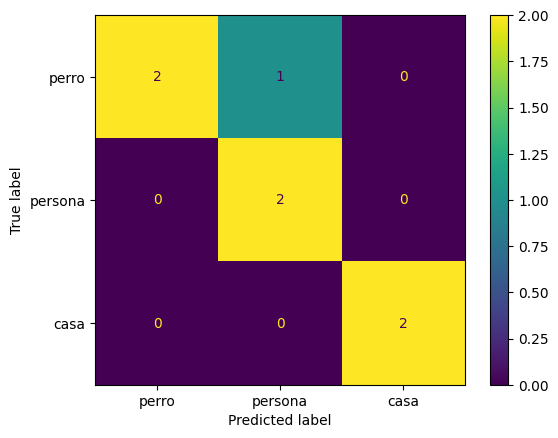

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels = ['perro','persona','casa']
disp.plot()

In [43]:
y_test

array([0, 0, 0, 2, 1, 1, 2])

In [44]:
y_pred

array([1, 0, 0, 2, 1, 1, 2])

In [45]:
X_test[5]

array([[[0.96862745, 0.96862745, 0.97647059],
        [0.96862745, 0.96862745, 0.97647059],
        [0.96862745, 0.96862745, 0.97647059],
        ...,
        [0.8627451 , 0.86666667, 0.8745098 ],
        [0.85882353, 0.8627451 , 0.87058824],
        [0.85882353, 0.8627451 , 0.87058824]],

       [[0.96862745, 0.96862745, 0.97647059],
        [0.96862745, 0.96862745, 0.97647059],
        [0.96862745, 0.96862745, 0.97647059],
        ...,
        [0.8627451 , 0.86666667, 0.8745098 ],
        [0.85882353, 0.8627451 , 0.87058824],
        [0.85882353, 0.8627451 , 0.87058824]],

       [[0.96862745, 0.96862745, 0.97647059],
        [0.96862745, 0.96862745, 0.97647059],
        [0.96862745, 0.96862745, 0.97647059],
        ...,
        [0.8627451 , 0.86666667, 0.8745098 ],
        [0.85882353, 0.8627451 , 0.87058824],
        [0.85882353, 0.8627451 , 0.87058824]],

       ...,

       [[0.92156863, 0.9254902 , 0.93333333],
        [0.92156863, 0.9254902 , 0.93333333],
        [0.91764706, 0

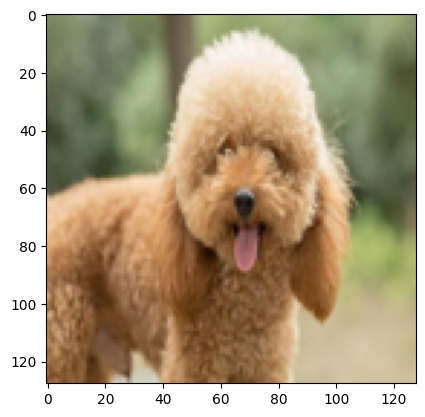

In [46]:
import matplotlib.pyplot as plt
img_array = (X_test[0] * 255).astype(np.uint8)  # Scale to 0-255 and convert to 8-bit integer
img = Image.fromarray(img_array)
plt.imshow(img)